In [1]:
import json, sys, random
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

C:\Users\cueva\Anaconda3\envs\tf_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from PIL import Image, ImageDraw 

In [5]:
from matplotlib import pyplot as plt

### Download and study the dataset

In [3]:
# download dataset from json object
f = open('/tmp/datasets/shipsnet/shipsnet.json')
dataset = json.load(f)
f.close()

In [6]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

INPUT

The dataset contains 2800 images. One image is represented as a vector of length 19200 elements (80×80×3)

In [37]:
input_data.shape

(2800, 19200)

In [8]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [9]:
# get one chanel
pic = X[0]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]

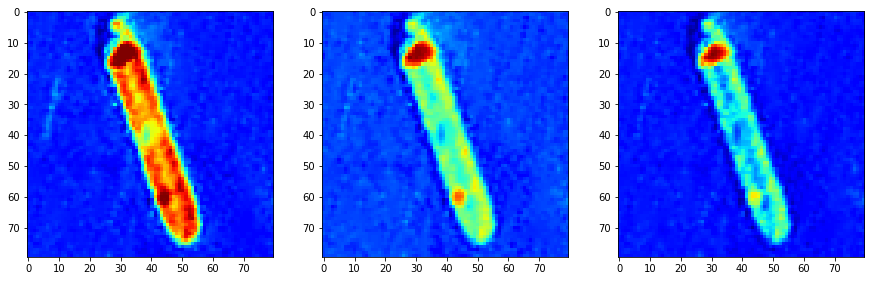

In [10]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
    
plt.show()

OUTPUT

The output is a vector of lenght 2800 elements.

In [11]:
output_data.shape

(2800,)

The vector contains int 0 and 1

In [12]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

Vector contains of 2100 zeros and 700 units. This means that in a dataset of 700 images tagged with "ship" and 2100 images marked as "not ship".

In [13]:
np.bincount(output_data)

array([2100,  700], dtype=int64)

### Preparing data

In [38]:
# one hot encoding
y = np_utils.to_categorical(output_data, 2)
print (y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
# shuffle all indexes
indexes = np.arange(2800)
np.random.shuffle(indexes)

In [39]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]
print(X_train.shape)

(2800, 80, 80, 3)


In [17]:
# normalization
X_train = X_train / 255

### Traing network

In [18]:
np.random.seed(42)

In [19]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [20]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Train on 2240 samples, validate on 560 samples
Epoch 1/18
 - 13s - loss: 0.4898 - acc: 0.7795 - val_loss: 0.4000 - val_acc: 0.8893
Epoch 2/18
 - 3s - loss: 0.2776 - acc: 0.8888 - val_loss: 0.2395 - val_acc: 0.9161
Epoch 3/18
 - 3s - loss: 0.2361 - acc: 0.9062 - val_loss: 0.2161 - val_acc: 0.9321
Epoch 4/18
 - 3s - loss: 0.1989 - acc: 0.9232 - val_loss: 0.1669 - val_acc: 0.9446
Epoch 5/18
 - 3s - loss: 0.1735 - acc: 0.9281 - val_loss: 0.1834 - val_acc: 0.9464
Epoch 6/18
 - 3s - loss: 0.1666 - acc: 0.9313 - val_loss: 0.1449 - val_acc: 0.9429
Epoch 7/18
 - 3s - loss: 0.1453 - acc: 0.9442 - val_loss: 0.1179 - val_acc: 0.9446
Epoch 8/18
 - 3s - loss: 0.1337 - acc: 0.9509 - val_loss: 0.1177 - val_acc: 0.9500
Epoch 9/18
 - 3s - loss: 0.1160 - acc: 0.9545 - val_loss: 0.1120 - val_acc: 0.9643
Epoch 10/18
 - 3s - loss: 0.1125 - acc: 0.9531 - val_loss: 0.0993 - val_acc: 0.9607
Epoch 11/18
 - 4s - loss: 0.0986 - acc: 0.9661 - val_loss: 0.0844 - val_acc: 0.9696
Epoch 12/18
 - 3s - loss: 0.0803 - ac

# Using network

### download image

In [41]:
image = Image.open('/tmp/datasets/shipsnet/sfbay_1.png')
pix = image.load()

In [23]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [24]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [42]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)
print(picture_tensor.shape)

(1777, 2825, 3)


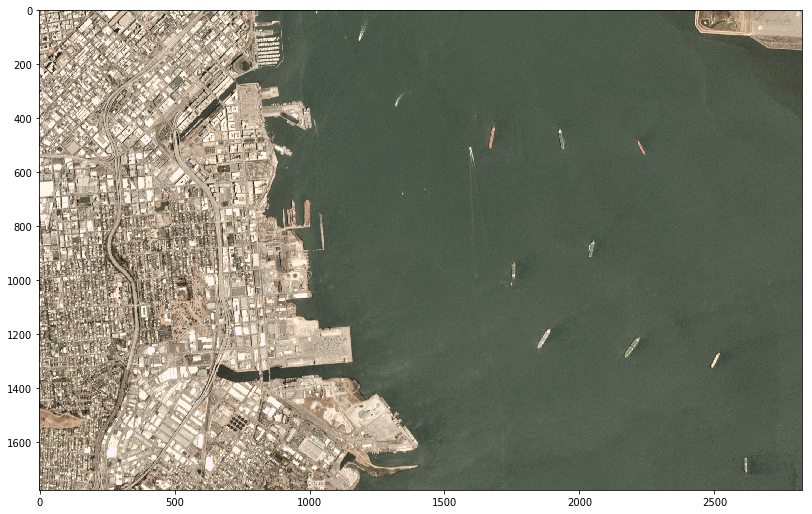

In [26]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [44]:
picture_tensor = picture_tensor.transpose(2,0,1)
print(picture_tensor.shape)

(2825, 3, 1777)


### Search on the image

In [28]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [29]:
# makes sure the object is not overlaping with another object 
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [30]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:1640 Y:420  [[0.0322896 0.9677104]]


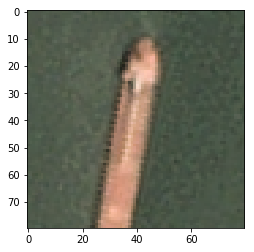

X:1890 Y:430  [[0.02234103 0.9776589 ]]


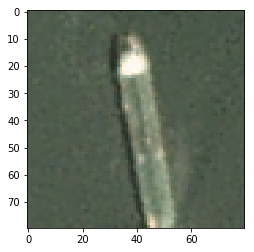

X:2190 Y:460  [[0.06285805 0.93714195]]


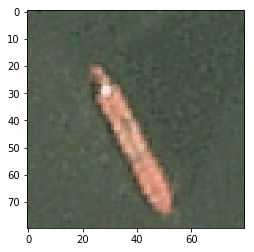

X:860 Y:480  [[0.06010361 0.93989635]]


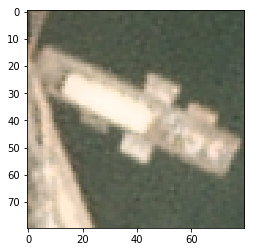

X:950 Y:690  [[0.07282799 0.927172  ]]


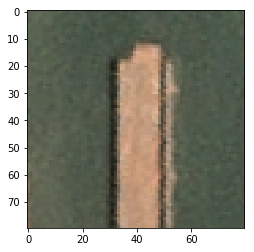

X:1720 Y:920  [[0.09108755 0.9089125 ]]


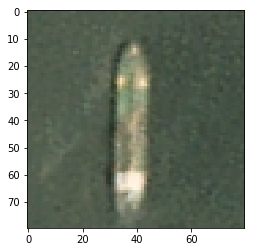

X:2460 Y:1260  [[0.03053302 0.969467  ]]


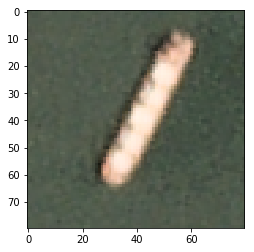

X:960 Y:1270   [[0.06156705 0.93843293]]


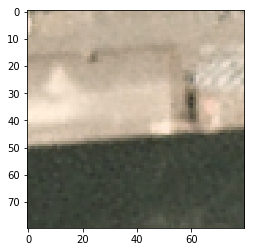

X:1310 Y:1650  [[0.05657226 0.9434278 ]]


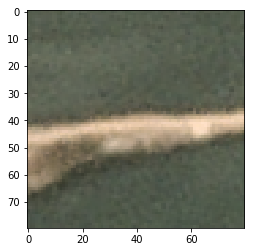

X:2740 Y:1690  

In [31]:
# sliding window, slide a 80 by 80 image prediction acrose the image 
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step)):
        # get the area of interest 
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [32]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [33]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1777, 2825, 3)

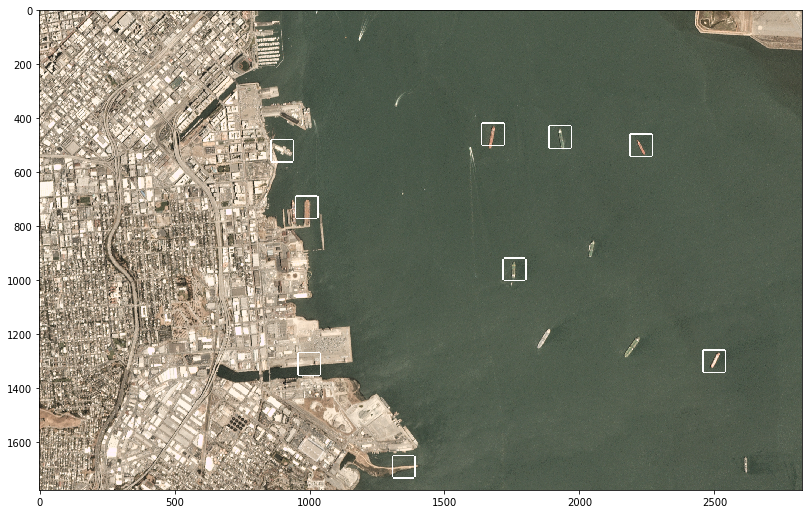

In [34]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()